In [1]:
import tensorflow as tf
from keras import models,layers,utils
from keras.utils import normalize,to_categorical
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Flatten
import matplotlib.pyplot as plt

(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

/Users/jamesjoseph/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 55s 0us/step


In [2]:
xtrain=normalize(xtrain,axis=1)
xtest=normalize(xtest,axis=1)
ytrain=to_categorical(ytrain,10)
ytest=to_categorical(ytest,10)

In [3]:
model=Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

/Users/jamesjoseph/Library/Python/3.9/lib/python/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(xtrain,ytrain,epochs=10,validation_data=(xtest,ytest),batch_size=256)
model.evaluate(xtest,ytest)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.2006 - loss: 2.1427 - val_accuracy: 0.2810 - val_loss: 1.9687
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.3100 - loss: 1.9137 - val_accuracy: 0.3237 - val_loss: 1.8911
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.3516 - loss: 1.8127 - val_accuracy: 0.3721 - val_loss: 1.7679
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.3819 - loss: 1.7356 - val_accuracy: 0.3810 - val_loss: 1.7390
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.4009 - loss: 1.6900 - val_accuracy: 0.3553 - val_loss: 1.8232
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.4034 - loss: 1.6779 - val_accuracy: 0.4019 - val_loss: 1.6723
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.4306 - loss: 1.6099 - val_accuracy: 0.3981 - val_loss: 1.6880
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.4442 - loss: 1.5679 - val_accu

[1.5861402750015259, 0.4293999969959259]

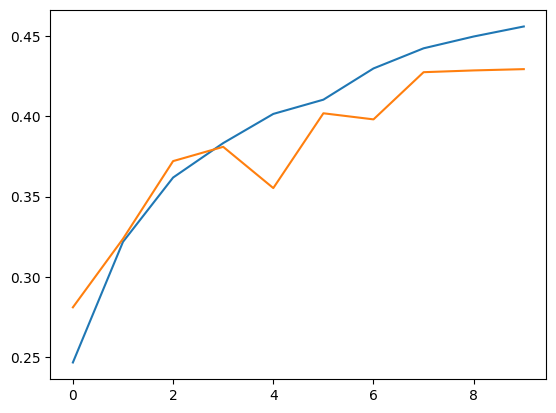

In [5]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.show()